<a href="https://colab.research.google.com/github/Paul9615/Paul_pytorch/blob/main/%5CPART1%5C2_Regression%5C3_1_SoftmaxRegression_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implement Softmax Regression using MNIST data

In [9]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim
import matplotlib.pyplot as plt
import random as rd 
%matplotlib inline

# set GPU on Colab
USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
# print(device)

rd.seed(1)
torch.manual_seed(1)
if device == 'cuda':
  torch.cuda.manual_seed_all(1)

In [10]:
# set hyper-parameters
train_epoch = 15
batch_size = 100  

In [17]:
# dataset 
train_data = dsets.MNIST(
    root = 'MNIST_data/',
    train = True,
    transform=transforms.ToTensor(),
    download = True
)
test_data = dsets.MNIST(
    root = 'MNIST_data/',
    train=False,
    transform = transforms.ToTensor(),
    download=True
)

data_loader = DataLoader(
    dataset = train_data,
    batch_size = batch_size,
    shuffle = True,
    drop_last= True # drop last batch, avoid overfitting
)


600


In [20]:
# model
# MNIST data image of shape 28 * 28 = 784 -> must check
linear = nn.Linear(784,10, bias=True).to(device) # use buas and run on GPU(to.(device)) 

# cost function and optimizer 
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 softmax function을 포함
opt = torch.optim.SGD(linear.parameters(),lr=0.1)

In [21]:
# train 
for epoch in range(train_epoch+1):
  avg_cost = 0 
  total_batch = len(data_loader)

  for x,y in data_loader:
    # batch size가 100이므로 x는 (100,784)의 tensor가 됨 
    x = x.view(-1,28*28).to(device)
    # one-hot encodding이 된 상태가 아니라 0~9의 정수
    y = y.to(device)

    opt.zero_grad()
    hyp = linear(x)
    cost = criterion(hyp,y)
    cost.backward()
    opt.step()

    avg_cost += cost/total_batch

    print(f'Epoch {(epoch+1):4d} Cost: {avg_cost:.9f}')


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch    8 Cost: 0.194109112
Epoch    8 Cost: 0.194520190
Epoch    8 Cost: 0.195020452
Epoch    8 Cost: 0.195877895
Epoch    8 Cost: 0.196637541
Epoch    8 Cost: 0.197172254
Epoch    8 Cost: 0.197786555
Epoch    8 Cost: 0.198152155
Epoch    8 Cost: 0.198717609
Epoch    8 Cost: 0.199049979
Epoch    8 Cost: 0.199436516
Epoch    8 Cost: 0.200231925
Epoch    8 Cost: 0.200847194
Epoch    8 Cost: 0.201286018
Epoch    8 Cost: 0.201830804
Epoch    8 Cost: 0.202200249
Epoch    8 Cost: 0.202600554
Epoch    8 Cost: 0.203225523
Epoch    8 Cost: 0.203635678
Epoch    8 Cost: 0.204085439
Epoch    8 Cost: 0.204686537
Epoch    8 Cost: 0.205010682
Epoch    8 Cost: 0.205334723
Epoch    8 Cost: 0.205614105
Epoch    8 Cost: 0.206471801
Epoch    8 Cost: 0.206919864
Epoch    8 Cost: 0.207434624
Epoch    8 Cost: 0.207769156
Epoch    8 Cost: 0.208127320
Epoch    8 Cost: 0.208346561
Epoch    8 Cost: 0.208754092
Epoch    8 Cost: 0.209137976
Epoch    8 Cost: 0.209968895
Epoch  

Accuracy: 0.8840000033378601
Label: 1
predidiction: 1


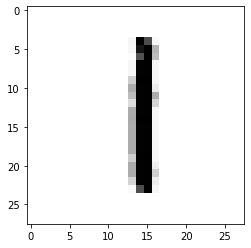

In [25]:
# model test
with torch.no_grad(): 
  x_test = test_data.test_data.view(-1,28*28).float().to(device)
  y_test = test_data.test_labels.to(device)

  pred = linear(x_test)
  corr_pred = torch.argmax(pred,1) == y_test
  acc = corr_pred.float().mean()
  print(f'Accuracy: {acc.item()}')

  # predict from test data randomly
  r = rd.randint(0,len(test_data)-1)
  x_single_data = test_data.test_data[r:r+1].view(-1,28*28).float().to(device) # code 의미 파악
  y_single_data = test_data.test_labels[r:r+1].to(device)

  print(f'Label: {y_single_data.item()}')
  single_pred = linear(x_single_data)
  print(f'predidiction: {torch.argmax(single_pred,1).item()}')

  plt.imshow(test_data.test_data[r:r+1].view(28,28),cmap='Greys', interpolation='nearest') # code 의미 파악
  plt.show()